#### `PR-Curve` clearly explained! 🚀 

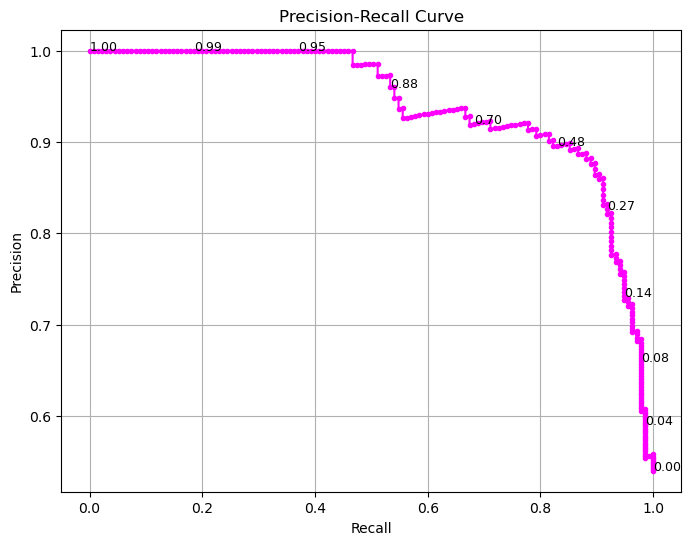

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Dataset Creation
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Training
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Prediction Probabilities
y_scores = clf.predict_proba(X_test)[:, 1]

# Calculate Precision and Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot the PR Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='magenta')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)

# Annotating thresholds on the curve
thresholds = list(thresholds)
thresholds.insert(0, 0)  # Add a threshold value at the start for annotation purposes
for i in range(0, len(thresholds), 25):
    plt.annotate(f"{thresholds[i]:.2f}", (recall[i], precision[i]), fontsize=9)

plt.show()

#### Comparing two different models

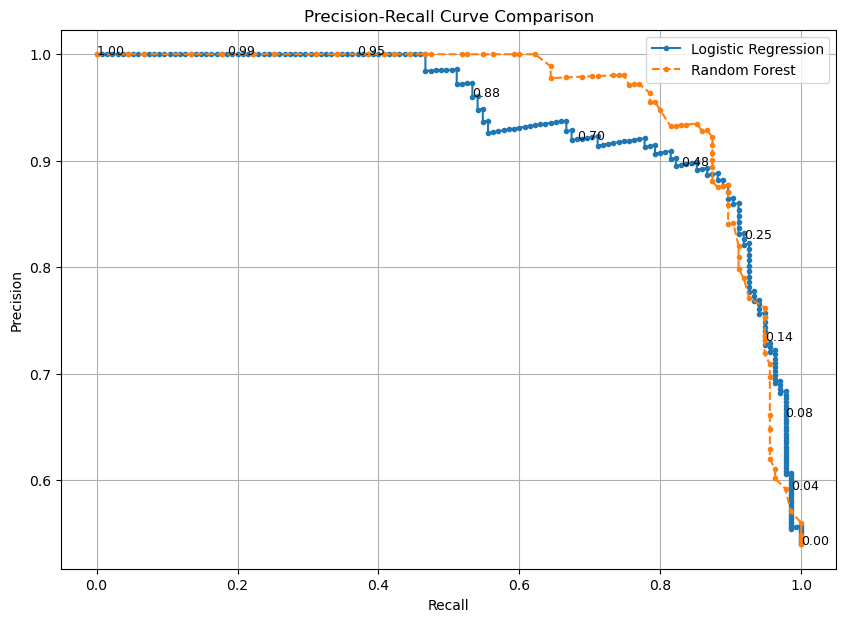

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

rf_y_scores = rf_clf.predict_proba(X_test)[:, 1]

# Calculate Precision and Recall for Random Forest
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_y_scores)

# Plot the PR Curves for both classifiers
plt.figure(figsize=(10, 7))

# PR curve for Logistic Regression
plt.plot(recall, precision, marker='.', label='Logistic Regression')

# PR curve for Random Forest
plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest', linestyle='--')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.grid(True)

plt.show()